In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정
sns.set_theme(style="whitegrid")

# 데이터 로드
train = pd.read_csv('./titanic_train.csv')

# 상위 5개 행 확인
display(train.head())

# 데이터 정보 확인 (결측치, 데이터 타입 등)
print("\n=== 데이터 정보 ===")
train.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



=== 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# [칼럼 설명 Reference]
# PassengerId : 승객 번호
# Survived : 생존여부 (1: 생존, 0: 사망)
# Pclass : 티켓 등급 (1등급, 2등급, 3등급)
# Name : 승객 이름
# Sex : 성별
# Age : 나이
# SibSp : 동반한 형제자매, 배우자 수
# Parch : 동반한 부모, 자식 수
# Ticket : 티켓 번호
# Fare : 요금
# Cabin : 객실 번호
# Embarked : 탑승 항구 (C=Cherbourg, Q=Queenstown, S=Southampton)

=== 결측치 개수 ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/var/folders/v3/znnqbb7d4ln71d0zlg_vmm5w0000gn/T/ipykernel_97742/137052624.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Survived', palette='pastel')


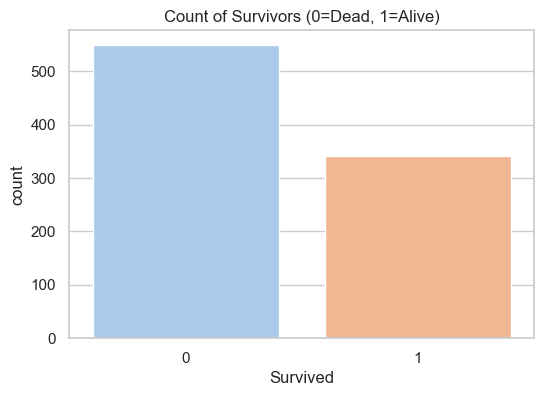

Survived
0    549
1    342
Name: count, dtype: int64


In [2]:
# 결측치 개수 확인
print("=== 결측치 개수 ===")
print(train.isnull().sum())

# 통계 요약 정보 (평균, 표준편차 등)
display(train.describe())

# 1. 생존자 vs 사망자 수 시각화
plt.figure(figsize=(6, 4))
# countplot: 범주형 데이터의 개수를 세어주는 그래프
sns.countplot(data=train, x='Survived', palette='pastel')
plt.title('Count of Survivors (0=Dead, 1=Alive)')
plt.show()

# 실제 수치 확인
print(train['Survived'].value_counts())

In [ ]:
# 1. Embarked (탑승 항구): 결측치가 2개뿐이므로, 가장 많이 탑승한 항구('S')로 채움
most_embarked = train['Embarked'].mode()[0] # 최빈값 구하기
train['Embarked'] = train['Embarked'].fillna(most_embarked)
print(f"Embarked 결측치를 '{most_embarked}'로 채웠습니다.")

# 2. Age (나이): 결측치를 전체 승객의 '중앙값(median)'으로 단순 보정
# (심화 과정에서는 호칭(Mr, Mrs)별 평균 나이로 채우기도 함)
median_age = train['Age'].median()
train['Age'] = train['Age'].fillna(median_age)
print(f"Age 결측치를 중앙값 '{median_age}'세로 채웠습니다.")

# 결측치 해결 확인
print(train.isnull().sum())

In [13]:
# 정규표현식을 사용하여 점(.)으로 끝나는 단어 추출
train['Title'] = train['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

# 비슷한 호칭끼리 묶어주기 (Mapping)
# 드문 호칭들은 'Others'나 비슷한 직위로 통합
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer') # 장교/전문직
train['Title'] = train['Title'].replace(['Jonkheer', 'Master'], 'Master') # 귀족/도련님
train['Title'] = train['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady', 'Dona'], 'Royalty') # 왕족
train['Title'] = train['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train['Title'] = train['Title'].replace(['Mlle', 'Miss'], 'Miss')
train['Title'] = train['Title'].replace(['Mr'], 'Mr')

# 잘 바뀌었는지 확인
print(train['Title'].value_counts())

Title
Mr          517
Miss        184
Mrs         127
Master       41
Officer      18
Royalty       3
Countess      1
Name: count, dtype: int64


In [14]:
# 구간 설정: 0~18세, 19~25세, ... 60~100세
bins = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']

# pd.cut 함수로 나이 구간 나누기
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=group_names)

print(train['AgeGroup'].value_counts())

AgeGroup
YoungAdult    196
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: count, dtype: int64


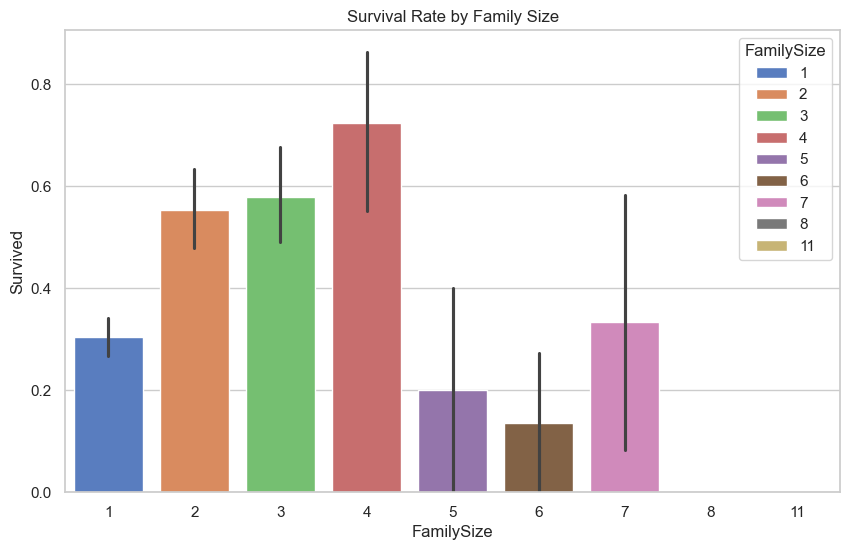

In [15]:
# 본인(1) + 형제자매 + 부모자식
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# 가족 규모별 생존율 확인을 위해 시각화해보기
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='FamilySize', y='Survived', palette='muted', hue='FamilySize')
plt.title('Survival Rate by Family Size')
plt.show()
# 인사이트: 혼자 온 것(1명)보다 2~4명 가족이 생존율이 높음

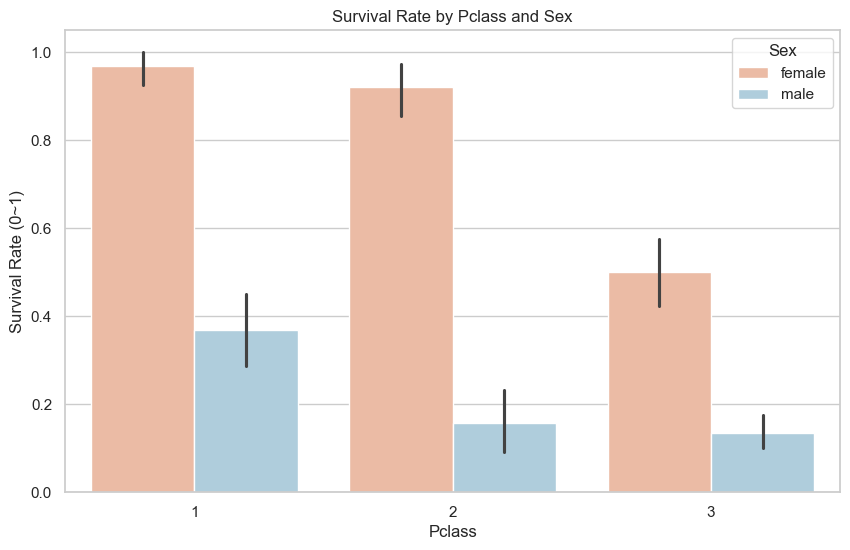

In [9]:
# 등급과 성별에 따른 생존률
plt.figure(figsize=(10, 6))

# Pclass별 생존율을 Sex로 나누어 보기
# ci=None: 신뢰구간(검은 세로줄) 제거하여 깔끔하게 보기
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train, palette='RdBu')

plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Rate (0~1)')
plt.show()

# 인사이트:
# 1. 여성이 남성보다 생존율이 월등히 높다.
# 2. 등급이 높을수록(1등급) 생존율이 높다.
# 3. 3등급 남성의 생존율이 가장 낮다.

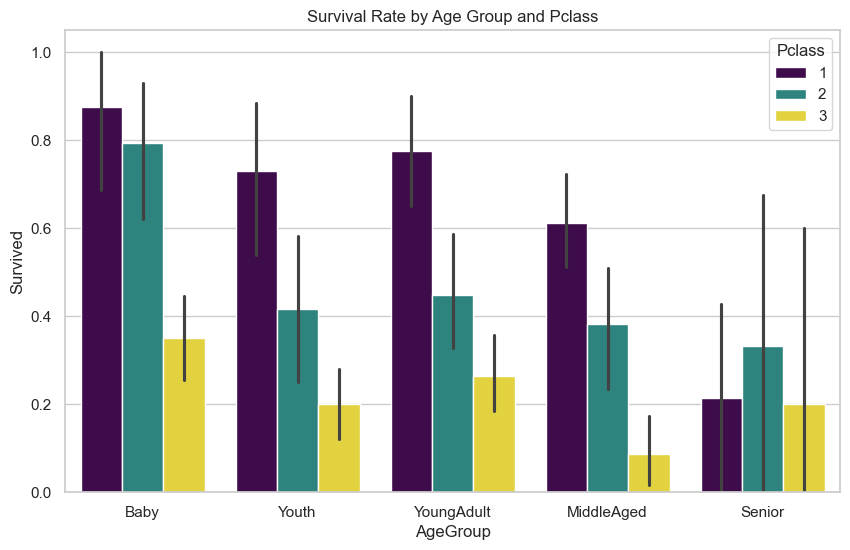

In [11]:
# 나이대별 생존률
plt.figure(figsize=(10, 6))

sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=train, palette='viridis')

plt.title('Survival Rate by Age Group and Pclass')
plt.show()

# 인사이트:
# Baby(아기)들의 생존율이 다른 연령대에 비해 비교적 높다.

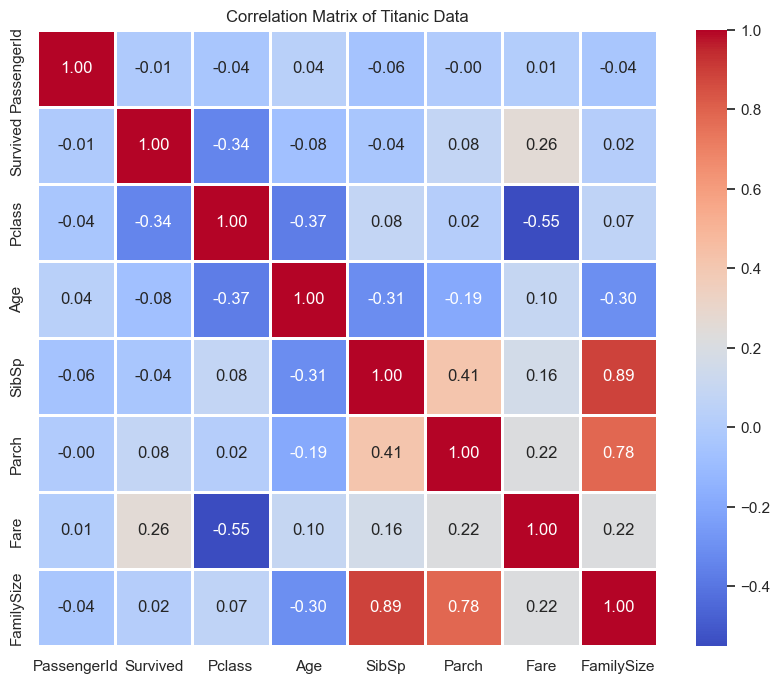

In [ ]:
# 상관관계
plt.figure(figsize=(10, 8))

# numeric_only=True: 수치형 데이터만 상관계수 계산
# cmap='coolwarm': 파랑(음의 상관) ~ 빨강(양의 상관)
sns.heatmap(train.corr(numeric_only=True), annot=True, linewidths=2, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix of Titanic Data')
plt.show()

# 인사이트:
# Fare(요금)와 Survived(생존)는 0.26의 양의 상관관계 (비쌀수록 생존율 높음)
# Pclass(등급)와 Survived(생존)는 -0.34의 음의 상관관계 (등급 숫자가 낮을수록(1등급) 생존율 높음)